Rafał Nowak
# Numerical Optimization
## Problem set 3 (12 points)

**Submission deadline**: Thursday, 26.11.2020

* All submissions should contain single file.<br/>This can be single Jupyter notebook file (with extension `ipynb`) or ZIP archive in case the are some additional files needed.
* It is recommended to write the reports using LaTeX. 
* One can report the answers, comments and results in PDF or notebook file.
* All the source code should be written in Python or Julia.

Mateusz Markiewicz
298653

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

### Problem 3.1 (3 pts)

In this problem we consider univariate function $f:\mathbb R\to\mathbb R$.
Let us remind the idea of bracketing method
> _Bracketing_ is the process of identifying an interval in which a local minimum lies and then successively shrinking the interval.

Implement the method `(a,b) = find_initial_bracket(f)` which for given function $f$ gives the bracketing interval $(a,b)$ such that there exist local minimum $c\in(a,b)$ satisfying $f(a)>f(c)<f(b)$.

```julia
function find_initial_bracket(f, x=0; s=1e-2, k=2.0)

end
```

```julia
# Example test
f(x) = 3*x^2 + exp(.3*x-9) + 20*x - 20
a, b = find_initial_bracket(f)
@show a, b
```
`(a, b) = (-5.109999999999999, -1.27)`

```julia
using Plotly
plot( f, a , b )
```
<a href="https://ibb.co/kXNfFMh"><img src="https://i.ibb.co/ZxqPCNh/f-bracket.png" alt="f-bracket" border="0"></a>

I implemented a function for finding initial brackets. 

Having $a$ and $b=a+s$ such that $f(a) > f(b)$ we can define $c=b+s=a+2s$.
* if $f(c) > f(b)$ we can stop the algorithm (because the direction of the funcsion has change on a,c interval)
* in other case we can start with new interval $a=b$ and $b=c$, and $s=2*s$.

In [2]:
def find_initial_bracket(f, x=0, s=1e-2, k=2.0):
    a,fa = x,f(x)
    b,fb = a+s,f(a+s)
    if fb>fa:
        a,fa,b,fb,s = b,fb,a,fa,-s
    while True:
        c,fc = b+s,f(b+s)
        if fc>fb:
            return min(a,c),max(a,c)
        a,fa,b,fb,s = b,fb,c,fc,k*s

In [3]:
def f(x):
    return 3*(x**2) + np.exp(.3*x-9) + 20*x - 20 

In [4]:
a, b = find_initial_bracket(f)
a,b

(-5.109999999999999, -1.27)

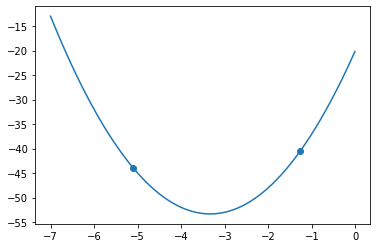

In [5]:
x = np.arange(-7,0,.01)
y = f(x)
plt.plot(x,y)
plt.scatter([a,b],[f(a),f(b)])
plt.draw()

### Problem 3.2 (4 pts)

In this problem we consider [unimodal function](https://www.wikiwand.com/en/Unimodality#/Unimodal_function)
and will play with _golden section search_ method.

First you should implement the _Fibonacci search_ algorithm provided that you have the (global) array of Fibonacci numbers. Next you should implement the _golden section search_ which uses only _golden ratio_ $\varphi = (1+\sqrt 5)/2$.

* Implement the [Fibonacci search algorithm](https://www.wikiwand.com/en/Golden-section_search#/Fibonacci_search)<br/>`(a, b) = fibonacci_search(f, a, b, n; ε=1e-4)`<br/>to be run on univariate function $f$, with bracketing interval $[a, b]$, for $n > 1$ function evaluations. It should return the new interval $(a, b)$. The optional parameter $\varepsilon$ should control the lowest-level interval length.
* Implement [Golden section search](https://www.wikiwand.com/en/Golden-section_search#)<br/>`(a, b) = gs_search(f, a, b, n)`<br/> to be run on a univariate function $f$ , with bracketing interval $[a, b]$ , for $n > 1$ function evaluations. It returns the new interval $(a, b)$. Guaranteeing convergence to within $\varepsilon$ requires $n = (b-a)/(\varepsilon \ln\varphi)$.

Present the results on various kind of functions.

References:
- [Fibonacci Search in Optimization of Unimodal Functions](https://www.maplesoft.com/applications/view.aspx?SID=4193&view=html)
- [Golden section search](https://www.wikiwand.com/en/Golden-section_search#)

Fibonacci search is a version of search in whiach a step in $i-th$ iteration is defined as $1 - \frac{Fib_{N-i}}{Fib_{N-i+1}}$. 

In golden section search in every iteration the step is defined as $1-\frac{\sqrt{5}-1}{2}$.

In [6]:
def fibonacci_search(f, a, b, n, epsilon=1e-4):
    Fibs = [1,2]
    for i in range(2,n+1):
        Fibs.append(Fibs[-1]+Fibs[-2])
        
    ai,bi = a,b
    for i in range(1,n+1):
        pi = 1 - Fibs[-1-i]/Fibs[-i]
        if i==n:
            pi += epsilon
        ai1 = ai + pi*(bi-ai)
        bi1 = ai + (1-pi)*(bi-ai)
        if f(ai1) < f(bi1):
            ai,bi = ai,bi1
        else:
            ai,bi = ai1,bi
    return ai,bi

In [7]:
for N in [3,5,10,50]:
    a1,b1 = fibonacci_search(f, a, b, N)
    print(f'N: {N}, interval: ({a1}, {b1})')

N: 3, interval: (-4.342, -3.5741536)
N: 5, interval: (-3.633076923076923, -3.3377513846153843)
N: 10, interval: (-3.3233279999999996, -3.2966666666666664)
N: 50, interval: (-3.3333355406518295, -3.333335540535317)


In [8]:
def gs_search(f, a, b, n):
    p = (3-5**0.5)/2
    ai,bi = a,b
    for i in range(n):
        ai1 = ai + p*(bi-ai)
        bi1 = ai + (1-p)*(bi-ai)
        if f(ai1) < f(bi1):
            bi = bi1
        else:
            ai = ai1
    return ai,bi

In [9]:
for N in [3,5,10,50]:
    a1,b1 = gs_search(f, a, b, N)
    print(f'N: {N}, interval: ({a1}, {b1})')

N: 3, interval: (-3.643250516799596, -2.7367494832004033)
N: 5, interval: (-3.429254651196366, -3.0830020671983847)
N: 10, interval: (-3.3475155039878866, -3.3162939279656785)
N: 50, interval: (-3.3333355798598756, -3.333335579723433)


$(\frac{\sqrt{5}-1}{2})^N \geq \frac{\epsilon}{b-a}$

In [10]:
epsilon = 1e-5
N = int(math.log(epsilon/(b-a), (math.sqrt(5)-1)/2))
a1,b1 = gs_search(f, a, b, N)
b1-a1

1.4146616416965685e-05

In [11]:
epsilon = 1e-10
N = int(math.log(epsilon/(b-a), (math.sqrt(5)-1)/2))
a1,b1 = gs_search(f, a, b, N)
b1-a1

1.364424129235431e-10

#### Tests

In [12]:
def f2(x):
    return x**2-10*x+4

N: 3, fib interval: (5.632, 7.168), gs interval: (4.373, 6.186)
N: 5, fib interval: (4.332, 4.923), gs interval: (4.801, 5.493)
N: 10, fib interval: (5.013, 5.067), gs interval: (4.964, 5.027)
N: 50, fib interval: (5.0, 5.0), gs interval: (5.0, 5.0)


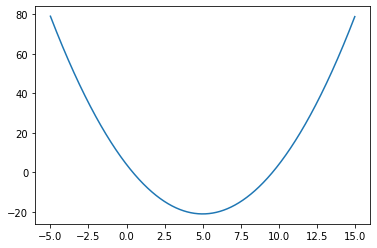

In [13]:
x = np.arange(-5,15,.01)
y = f2(x)
plt.plot(x,y)
a,b = find_initial_bracket(f2)

for N in [3,5,10,50]:
    a1,b1 = gs_search(f2, a, b, N)
    a1,b1 = np.round(a1,3), np.round(b1,3)
    a2,b2 = fibonacci_search(f2, a, b, N)
    a2,b2 = np.round(a2,3), np.round(b2,3)
    print(f'N: {N}, fib interval: ({a2}, {b2}), gs interval: ({a1}, {b1})')

In [14]:
def f3(x):
    return 3*x**3 + 15*x**2 - 10*x + 3 + np.sin(x)

N: 3, fib interval: (0.16, 0.256), gs interval: (0.23, 0.343)
N: 5, fib interval: (0.234, 0.271), gs interval: (0.257, 0.3)
N: 10, fib interval: (0.273, 0.277), gs interval: (0.276, 0.28)
N: 50, fib interval: (0.278, 0.278), gs interval: (0.278, 0.278)


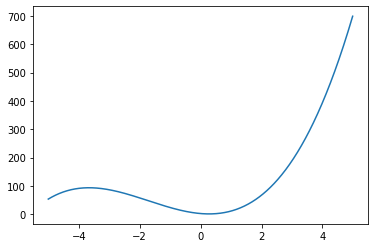

In [15]:
x = np.arange(-5,5,.01)
y = f3(x)
plt.plot(x,y)
a,b = find_initial_bracket(f3)

for N in [3,5,10,50]:
    a1,b1 = gs_search(f3, a, b, N)
    a1,b1 = np.round(a1,3), np.round(b1,3)
    a2,b2 = fibonacci_search(f3, a, b, N)
    a2,b2 = np.round(a2,3), np.round(b2,3)
    print(f'N: {N}, fib interval: ({a2}, {b2}), gs interval: ({a1}, {b1})')

### Problem 3.3 (5 pts)
Consider the [Rosenbrock's function](https://www.wikiwand.com/en/Rosenbrock_function)
$$ f(x_1, x_2) = 100(x_2-x_1^2)^2 + (1-x_1)^2 $$
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/32/Rosenbrock_function.svg/640px-Rosenbrock_function.svg.png">

1. (3 pts) Implement the function that takes the (column) vector $x\in \mathbb R^2$ and returns the value, gradient and Hessian matrix of the Rosenbrock's function at point $x$.
```julia
function rosenbrock (x)
    ...
    return f, ∇, H
end
```
2. (2 pts) Plot the following graphs:
  * contours
  * 3-dimensional view of the surface

Rosenbrock function: $f(x1,x2) = 100(x_2-x_1^2)^2 + (1-x_1)^2$

$\nabla f = \begin{pmatrix}
400x_1^3 - 400x_1x_2 +2x_1 -2 &\\
200(x_2-x_1^2)\\
\end{pmatrix}$

$\,$

$\nabla^2 f = \begin{pmatrix}
1200x_1^2 - 400x_2 +2 & -400x_1 \\
-400x_1 & 200
\end{pmatrix}$

In [16]:
def rosenbrock(x):
    val = 100 * (x[1] - (x[0])**2)**2 + (1-x[0])**2
    dVdx0 = 400*(x[0])**3 - 400*x[0]*x[1] + 2*x[0] -2
    dVdx1 = 200*(x[1]-(x[0])**2)
    dVdx02 = 2-400*x[1]+1200*(x[0])**2
    dVdx12 = 200
    dVdx01 = -400*x[0]
    H = np.array([[dVdx02,dVdx01],[dVdx01, dVdx12]])
    return [val, np.array((dVdx0, dVdx1)), H]

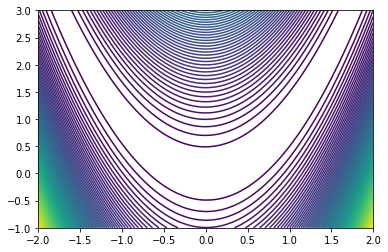

In [17]:
N = 500
X, Y = np.meshgrid(np.linspace(-2,2,N), np.linspace(-1,3,N))
Z = np.dstack((X,Y))
Z = Z.reshape(N*N,2)
Z = np.apply_along_axis(lambda x: 100 * (x[1] - (x[0])**2)**2 + (1-x[0])**2, 1, Z)
Z = Z.reshape(N,N)
plt.contour(X, Y, Z,levels=100)
plt.show()

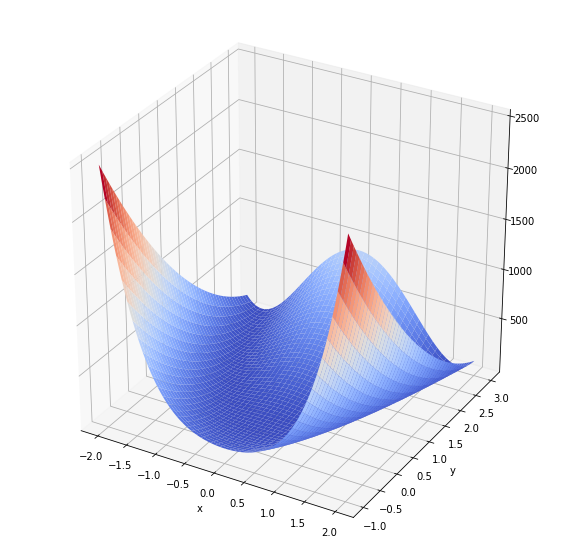

In [18]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, cmap=cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
plt.show()